## 1

**CH 5 이자율**   
이자율에는 명목이자율과 실질 이자율이 존재.
명목이자율은 실질이자율에 기대인플레이션율을 더해서 구할 수 있음   
(Fisher Equation)  

**다른 기간의 수익률 비교**   
EAR(Effective interest rate): 1년으로 환산  
APR(annual percentage rate): APR = [(1+EAR)T-1]/T (EAR을 더 짧게 쪼갬)  
Continuous Compounding: ln(1+EAR) = rcc (T가 무한히 짧아졌을 때)  

**리스크와 리스크 프리미엄, 샤프비율**  
HPR = $\frac{Ending\ Price\ -\ Beginning\ Price+\ Cash\ Dividend}{Beginning\ Price}$  
기대수익률: 각 자산의 비중과 수익률을 곱한 후 더해서 구함.  
기대수익률의 분산: 기대수익률의 편차의 제곱의 평균  
초과 수익률(excess return): HPR과 무위험이자율의 차이  
risk aversion(위험 회피): 위험을 얼마나 선호하는 지의 정도  
표준편차의 기간이 다르다면 \sqrt t, 분산의 기간이 다르다면 t를 곱해줘서 비교해야한다.  
샤프비율: $\frac{Risk\ Premium}{STD\ of\ Excess\ Return}$    

**정규분포**  
정규분포는 평균과 분산을 모수로 가지는 분포로 종모양을 띈다.  
분포가 정규분포인지 확인하기 위해 평균, 분산 외에도, 왜도와 첨도도 고려해볼 수 있다.  
왜도(skewness): $E[{\frac{\left(x-\mu\right)}{\sigma}}^3$] (분포가 비대칭인 정도)  
첨도(Kurtosis): $E[{\frac{\left(x-\mu\right)}{\sigma}}^4]-3$ (분포가 뾰족한 정도)  
VaR: 일정 기간 동안 정해진 신뢰수준 하에서 발생할 수 있는 최대 손실  
기대손실(Expected Shortfall): VaR 이상의 손실의 평균값(c-VaR)  
LSPD: 마이너스 수익률의 표준편차  
소티노비율: 샤프비율에서 표준편차를 LSTD로 대체  
주식의 가격은 로그정규분포를 따른다고 알려짐(수익률은 정규분포를 따른다고 알려짐)  

  



**CH 6**  
투자자마다 위험 기피 성향(A)이 다름. 이에 따라 효용함수가 달라짐   
$U=E[r]-\frac{1}{2} A\sigma^2$  
기피 A<0, 중립 A=0, 애호 A>0 ->효용함수를 최대화하는 것이 목표  
T-bill과 같이 위험이 (사실상) 없는 자산을 무위험자산이라고 함  
위험자산과 무위험자산의 조합으로 이뤄진 포트폴리오의   기대수익률과 변동성을 나타낸 것을 CAL(자본배분선)이라고 함.  
CAL의 x축은 변동성, Y축은 기대수익률. 기울기는 샤프비율, y절편은 무위험 이자율이 됨.  
만약 포트폴리오가 자본시장(Index 등으로 나타냄)일 때의 CAL이 CML(자본시장선이 됨)  

## 2(문제출제)

2015년 1월~ 2022년 12월까지 삼성전자와 네이버의 월간 수악률을 구하고, 월간수익률의 평균, 표준편차를 계산하세요.  
그리고 월간 수익률의 분포를 히스토그램을 사용해 시각화 해보세요

In [1]:
# pip install finance_datareader

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import FinanceDataReader as fdr

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 종가 데이터를 가져옴
samsung = "005930"
naver = "035420"
start_date, end_date = "2014-12-01", "2023-01-01"
samsung_df = fdr.DataReader(samsung, start_date, end_date)['Close']
naver_df = fdr.DataReader(naver, start_date, end_date)['Close']

In [4]:
samsung_return = samsung_df.resample("M").last().pct_change().dropna()
naver_return = naver_df.resample("M").last().pct_change().dropna()

In [5]:
samsung_return.head()

Date
2015-01-31    0.028636
2015-02-28   -0.005861
2015-03-31    0.061901
2015-04-30   -0.021513
2015-05-31   -0.073050
Freq: M, Name: Close, dtype: float64

In [6]:
print("삼성전자")
print(f"삼성전자 평균 월수익률: {samsung_return.mean()} \n삼성전자 월수익률 표준편차: {samsung_return.std()}")
print("네이버")
print(f"네이버 평균 월수익률: {naver_return.mean()} \n네이버 월수익률 표준편차: {naver_return.std()}")

삼성전자
삼성전자 평균 월수익률: 0.01019081741665047 
삼성전자 월수익률 표준편차: 0.07233995381395614
네이버
네이버 평균 월수익률: 0.006479260509225544 
네이버 월수익률 표준편차: 0.09211146286028463


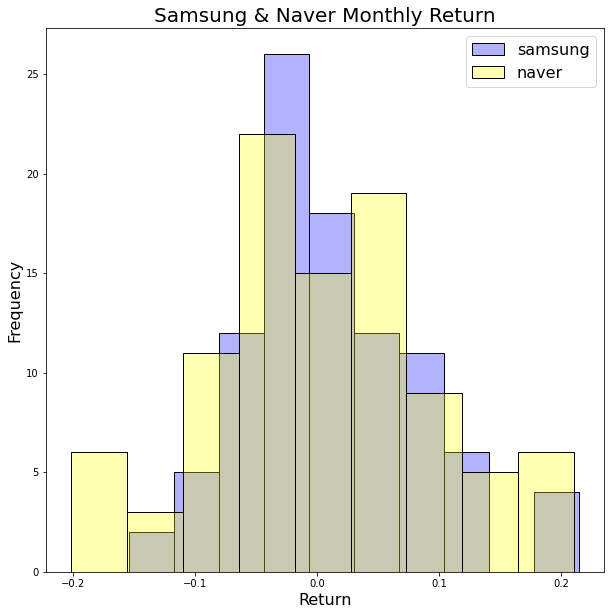

In [7]:
plt.figure(figsize=(10,10))
sns.histplot(samsung_return, color = "blue", alpha = 0.3, label = "samsung")
sns.histplot(naver_return, color = "yellow", alpha = 0.3, label = "naver")
plt.title("Samsung & Naver Monthly Return", fontsize=20)
plt.xlabel("Return", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.legend(fontsize=16)
plt.show()

## 3

### 1, 2

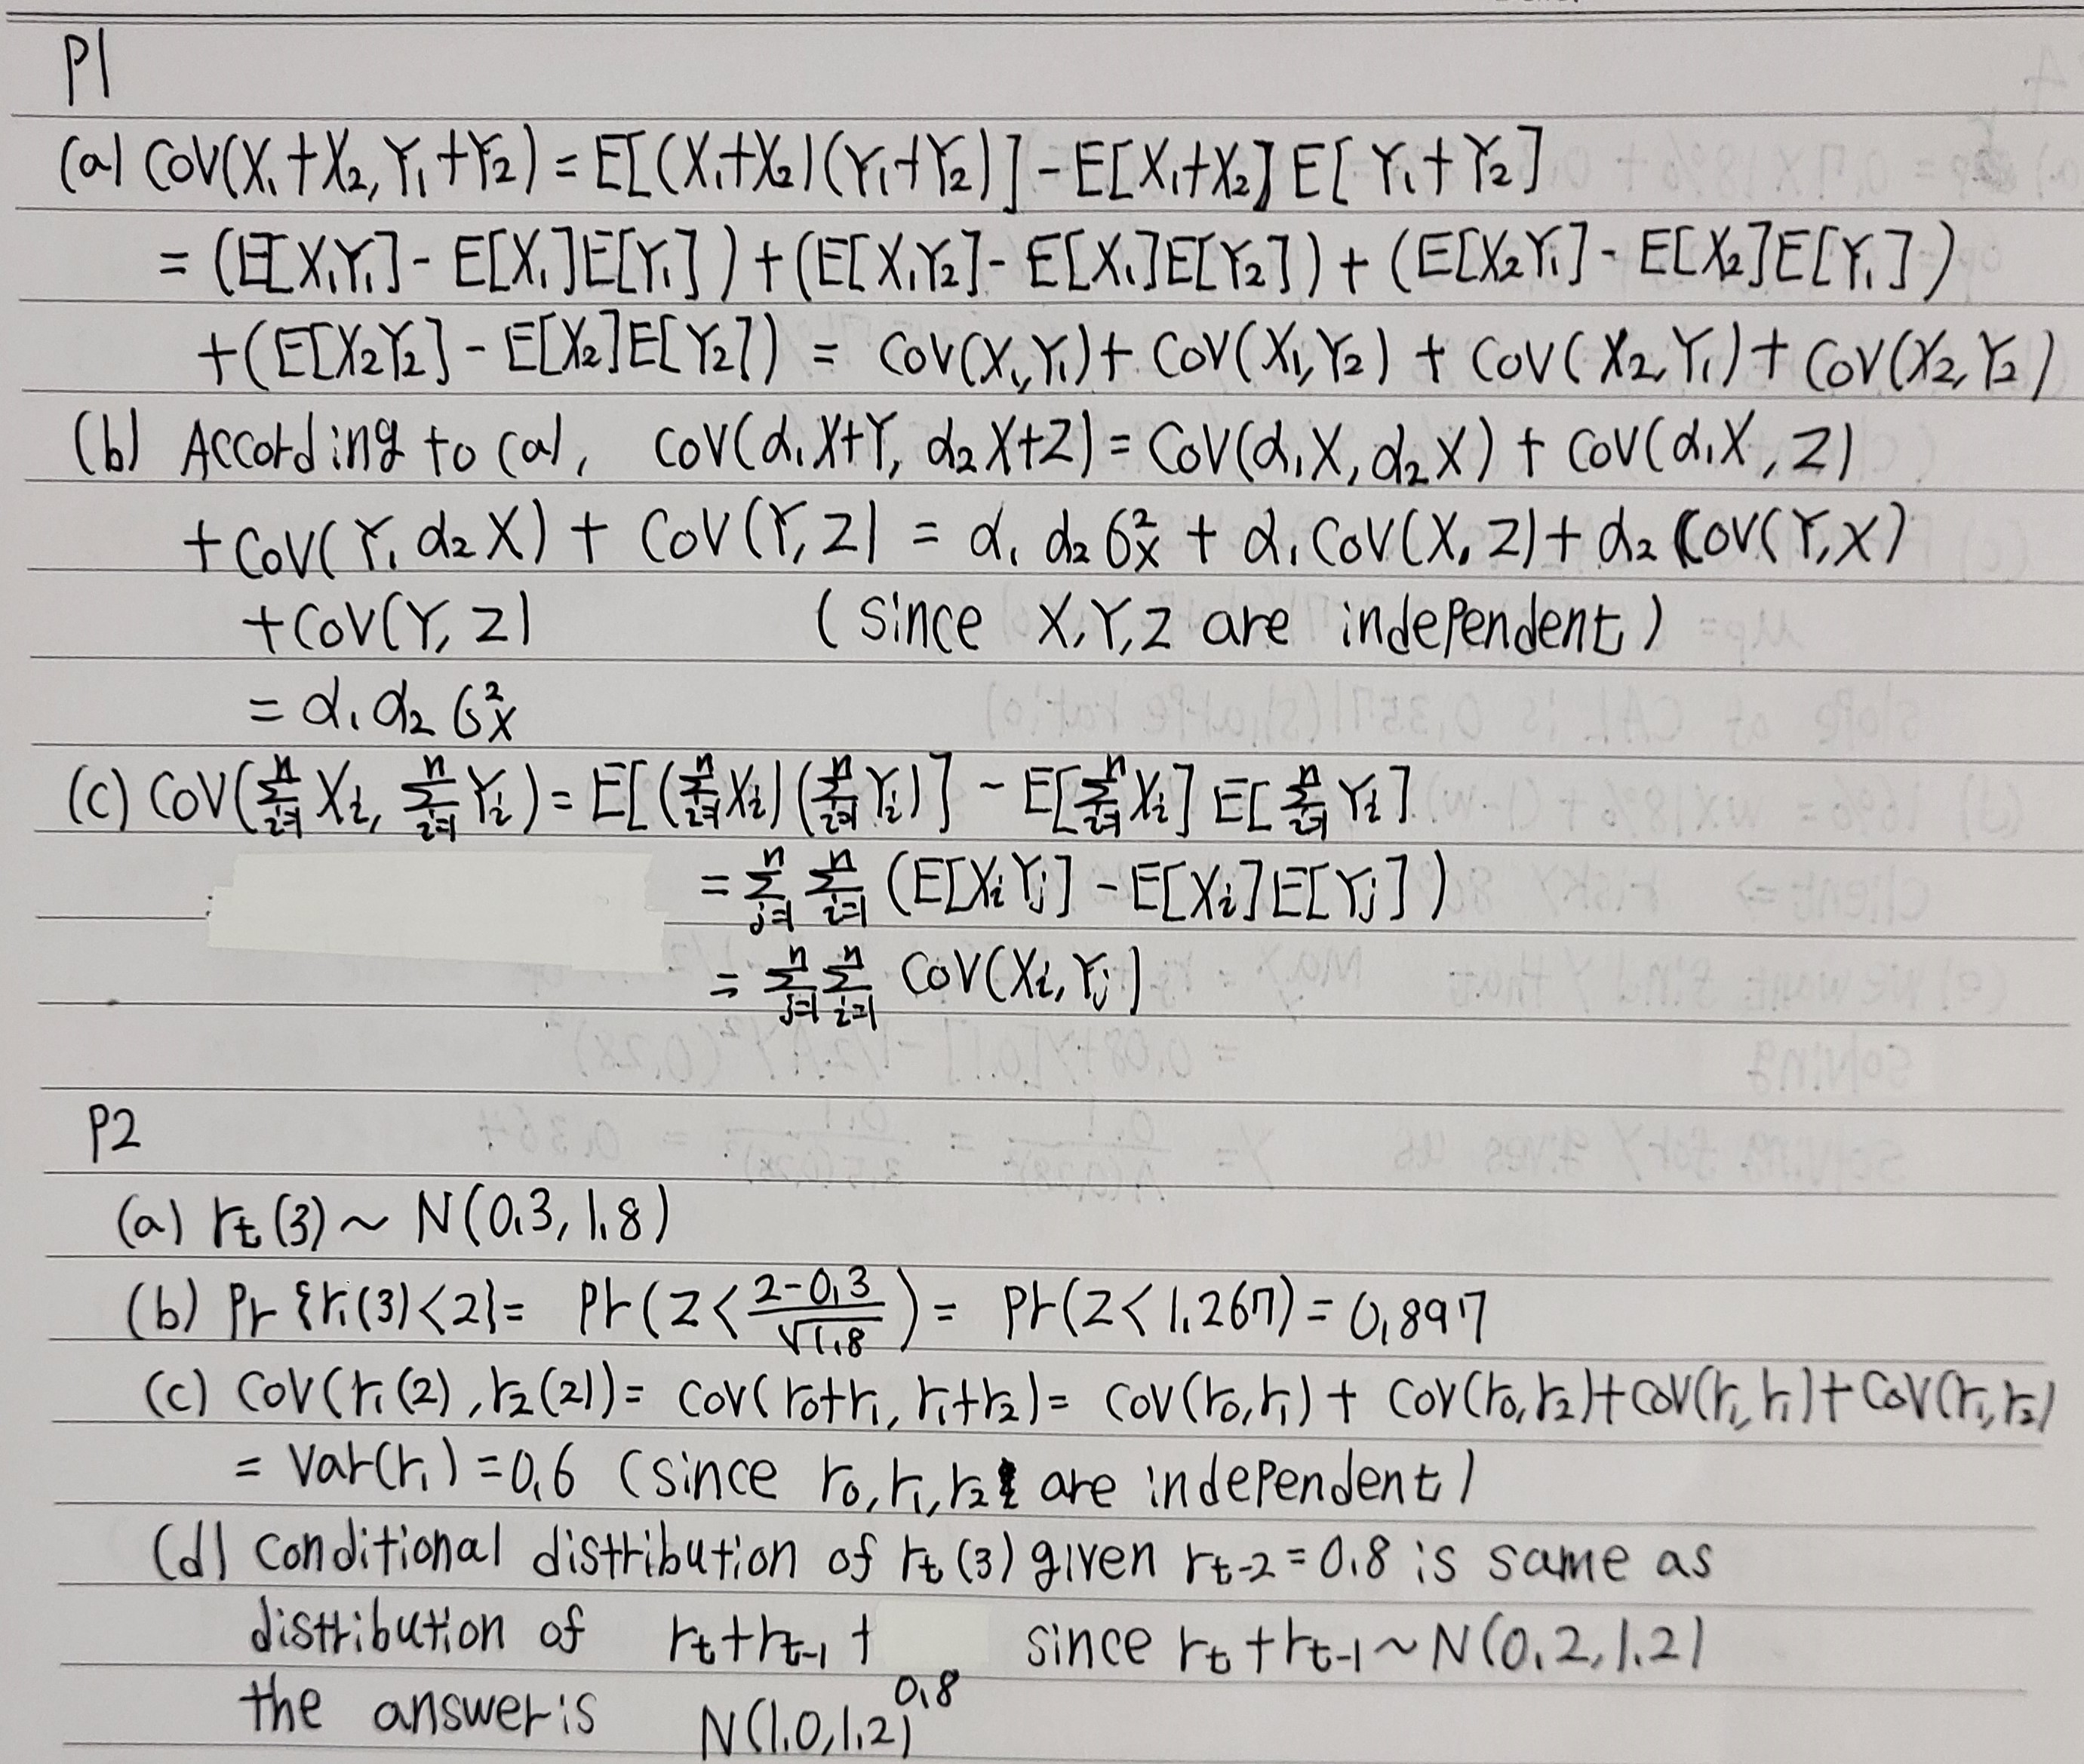

### 3

In [8]:
# 데이터를 부분적으로 엑셀로 편집해 사용
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("6_Portfolios_2x3.csv", skiprows=15, index_col=0)[:-1]
df.index = pd.to_datetime([str(x)+"01" for x in df.index])

start, end = "1930-01-01", "2016-12-01"
df = df[(df.index >= start) & (df.index <= end)]

In [10]:
first_half = df[:len(df)//2]
second_half = df[len(df)// 2:]
print("length of first half: ", len(first_half))
print("length of second half: ", len(second_half))

length of first half:  522
length of second half:  522


In [11]:
avg_1, avg_2 = first_half.mean(), second_half.mean()
std_1, std_2 = first_half.std(), second_half.std()
skew_1, skew_2 = pd.Series(skew(first_half), index=first_half.columns), pd.Series(skew(second_half), index=first_half.columns)
kurt_1, kurt_2 = pd.Series(kurtosis(first_half), index=second_half.columns), pd.Series(kurtosis(second_half), index=second_half.columns)

In [12]:
print("Average")
display(pd.DataFrame([avg_1, avg_2],columns=first_half.columns, index=['first_half', 'second_half']))

print("Standard Deviation")
display(pd.DataFrame([std_1, std_2],columns=first_half.columns, index=['first_half', 'second_half']))

print("Skewness")
display(pd.DataFrame([skew_1, skew_2],columns=first_half.columns, index=['first_half', 'second_half']))

print("Kurtosis")
display(pd.DataFrame([kurt_1, kurt_2],columns=first_half.columns, index=['first_half', 'second_half']))

Average


,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
first_half,1.024198,1.213739,1.511161,0.822079,0.851891,1.219600
second_half,0.970406,1.356887,1.474460,0.911314,1.047693,1.146156


Standard Deviation


,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
first_half,8.167532,8.403087,10.213409,5.725235,6.749528,8.955875
second_half,6.877888,5.416383,5.623990,4.752205,4.400784,4.983831


Skewness


,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
first_half,1.243805,1.657193,2.364409,0.162403,1.760002,1.760693
second_half,-0.394467,-0.555309,-0.474237,-0.309129,-0.432364,-0.542507


Kurtosis


,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
first_half,9.357201,13.131199,17.545599,7.014965,17.772378,14.329782
second_half,2.021791,3.286310,4.096027,1.926763,2.382288,2.714388


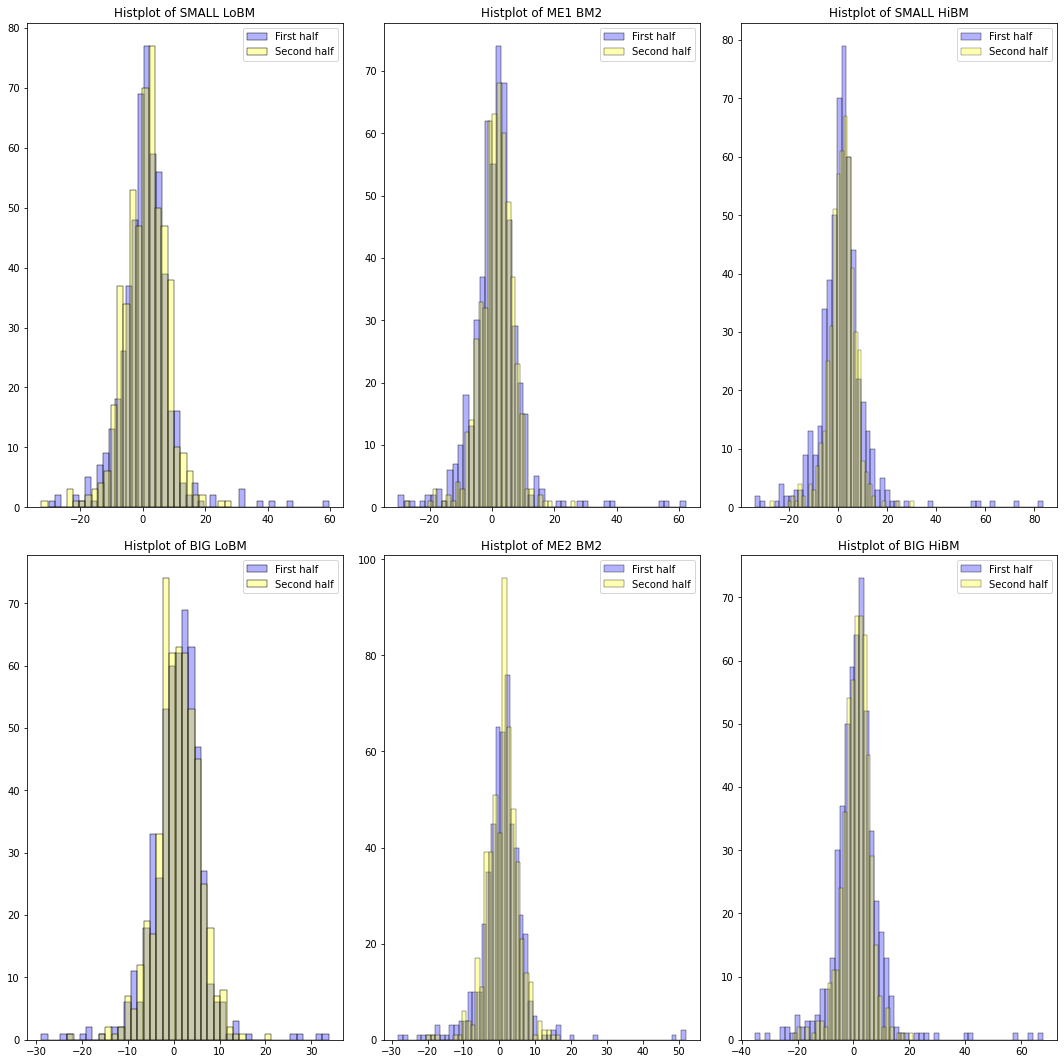

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))

column_list = first_half.columns

for index, column in enumerate(column_list):
    
    row = index // 3
    col = index % 3
    
    # first half visualization
    sns.histplot(x = column, data = first_half, color = "blue", alpha = 0.3, label = "First half", ax = axes[row][col])
    
    # second half visualization
    sns.histplot(x = column, data = second_half, color = "yellow", alpha = 0.3, label = "Second half", ax = axes[row][col])
    
    axes[row][col].set_title("Histplot of {}".format(column))
    axes[row][col].set_xlabel("")
    axes[row][col].set_ylabel("")
    axes[row][col].legend()
    
fig.tight_layout(pad = 1.5)

### 4

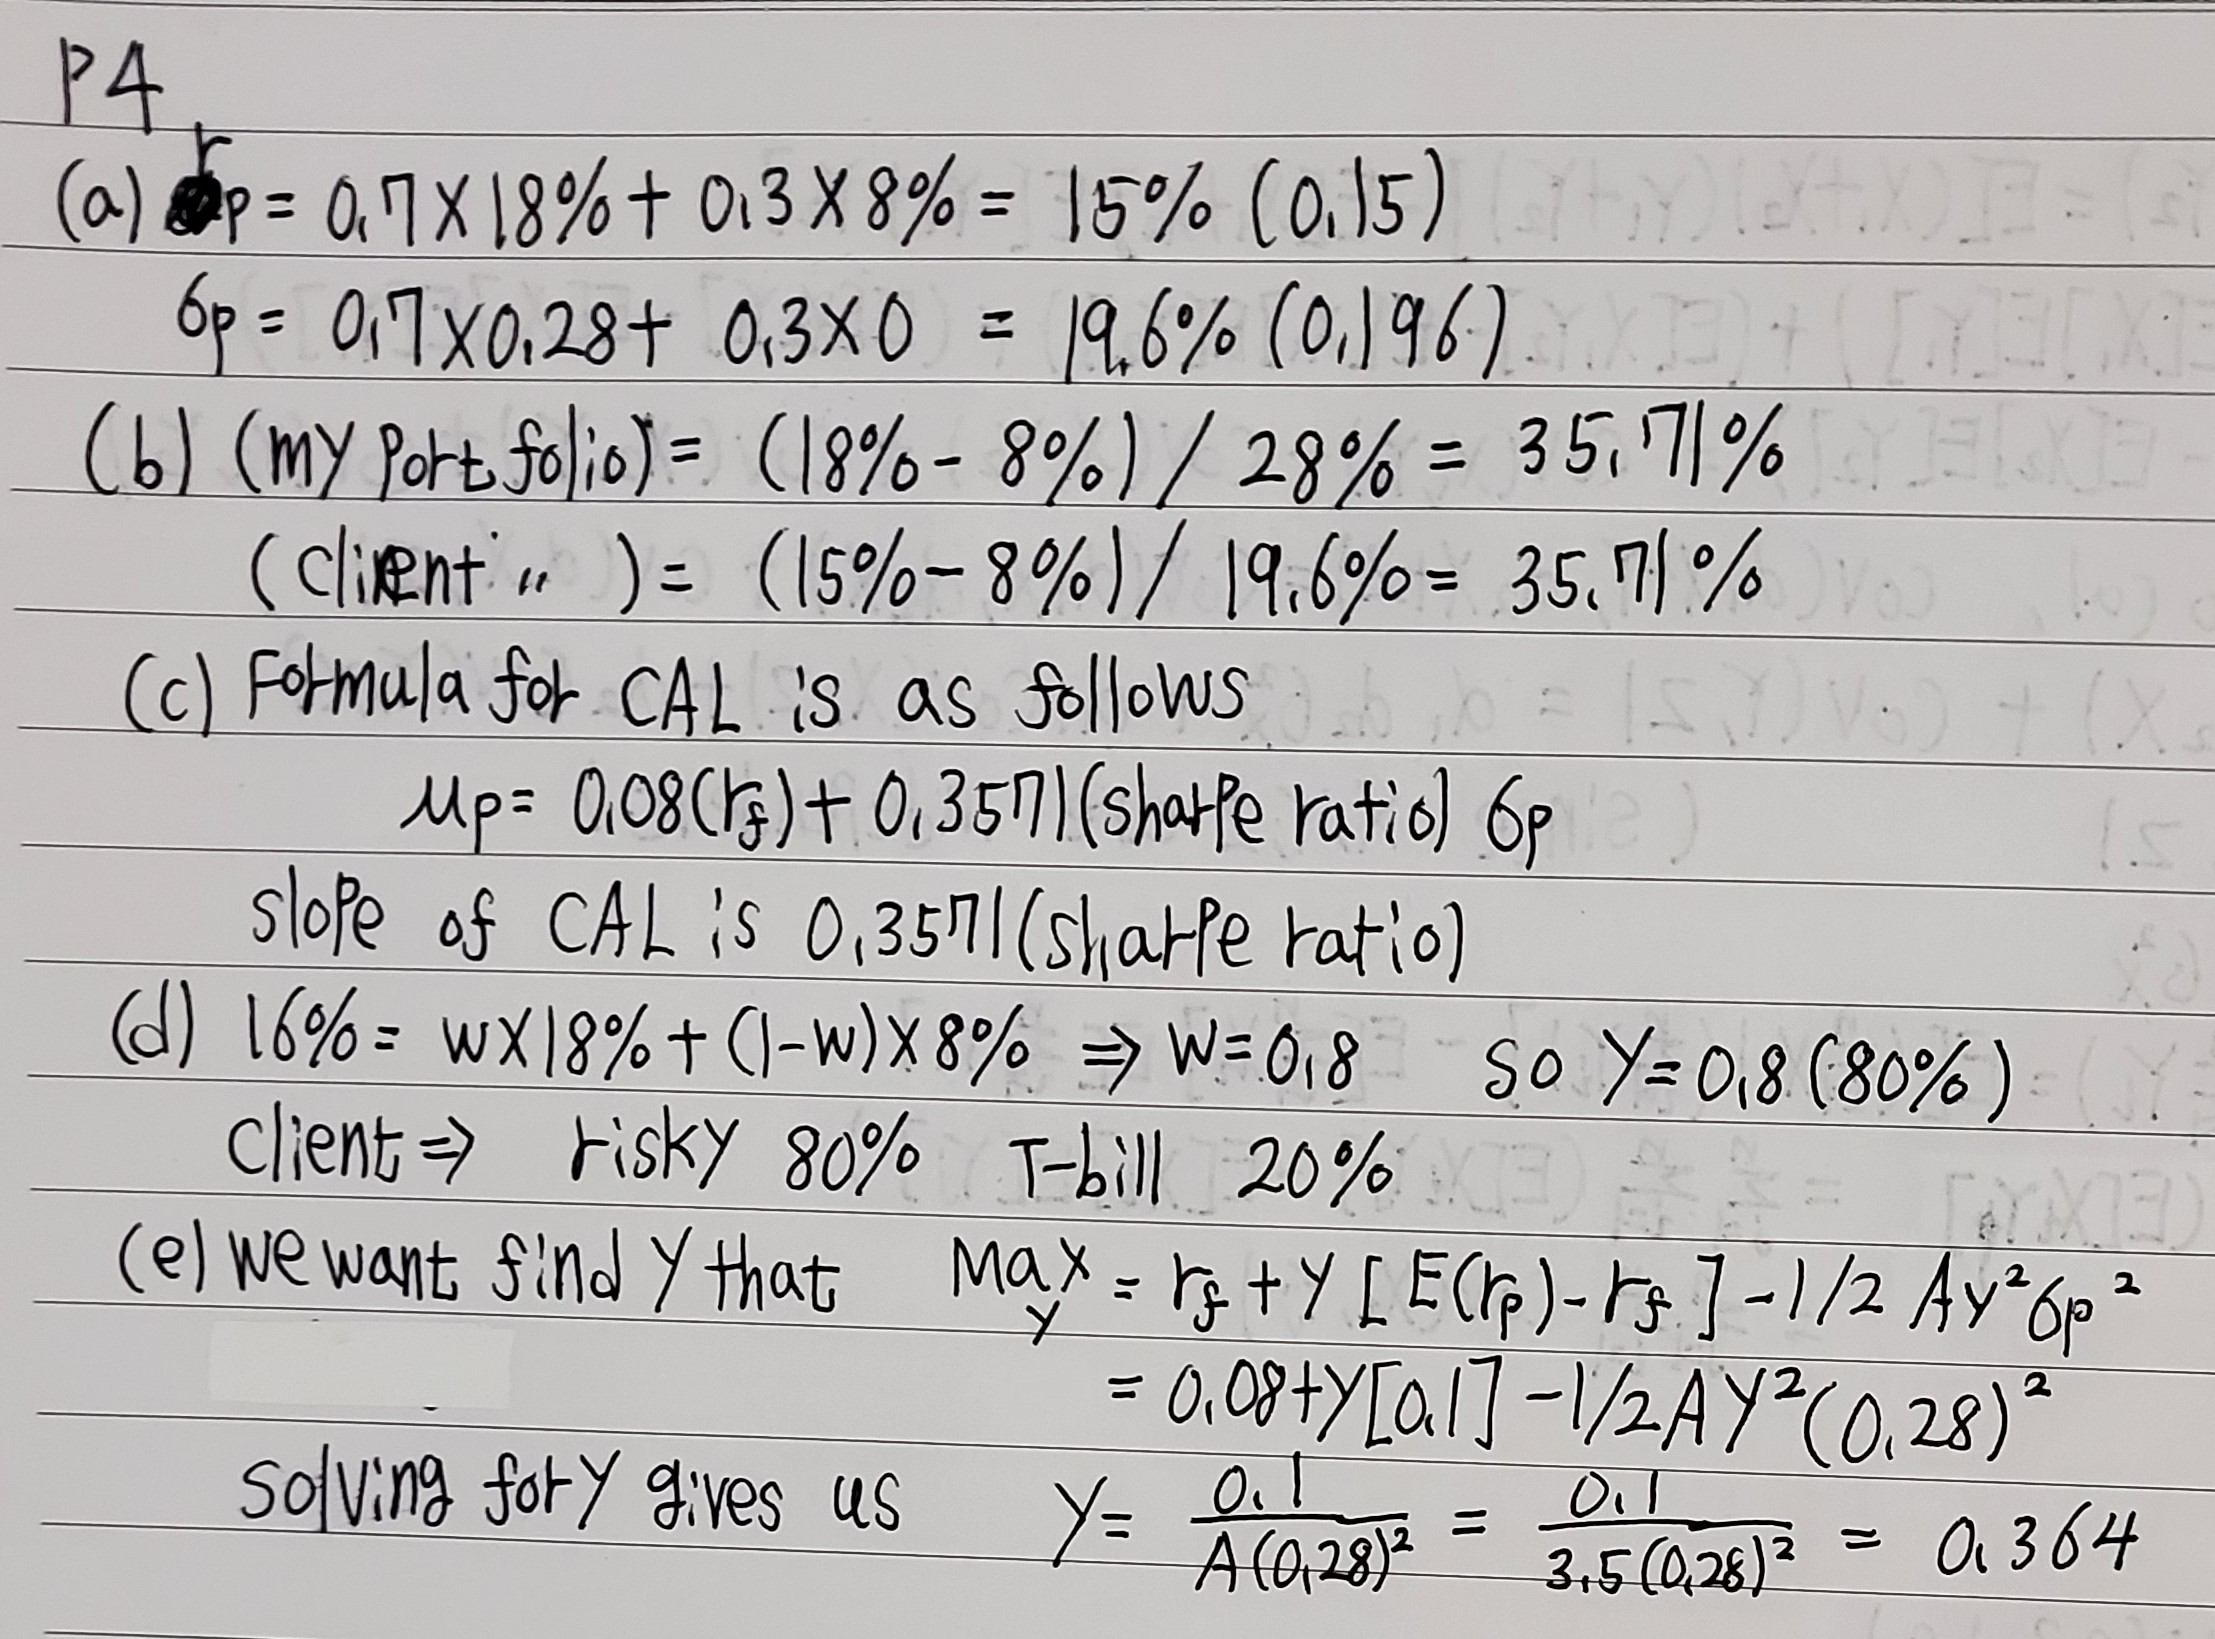